## Breast Cancer Wisconsin Dataset
July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

### Prepare the dataset
Exploring the dataset with 569 samples breast and 30 features. Target label is ['malignant' 'benign']. Malignant cancer that is more severe and can spread to other parts of the body (1) or Benign cancer that is less severe and less likely to spread (0).

Dummy Example:

| Sample | Feature 1 | Feature.. | Feature 30 |
|--------|-----------|-----------|-----------|
|   1    |    17.99  |   10.38   |   122.8   |
|  ..    |    20.57  |   17.77   |   132.9   |
|  569    |    19.69  |   21.25   |   130.0   |

In [111]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# print(f"Data: {cancer.data}")
print(f"The shape: {cancer.data.shape}")
# print(f"The target (the label cancer/not cancer): {cancer.target}")
print(f"The target shape {cancer.target.shape}")
print(f"The target name {cancer.target_names}") 
print(f"There are 30 Features names(charasteristic).  {cancer.feature_names}") 
print(f"First three samples: \n {cancer.data[:3]}")
# print(cancer.DESCR)


The shape: (569, 30)
The target shape (569,)
The target name ['malignant' 'benign']
There are 30 Features names(charasteristic).  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
First three samples: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.

### box show the features 4 and 24 has large scale

- Boxes: represents the IQR, the bottom edge of the box is the first quartile (Q1), and the top edge is the third quartile (Q3). The median by a line inside the box.

- Whiskers: the lines that extend from the top and bottom of the box to show the highest and lowest values, the range of the data excluding outliers.

- Outliers: The individual points that beyond the whiskers are considered outliers.

mean smoothness
worst smoothness


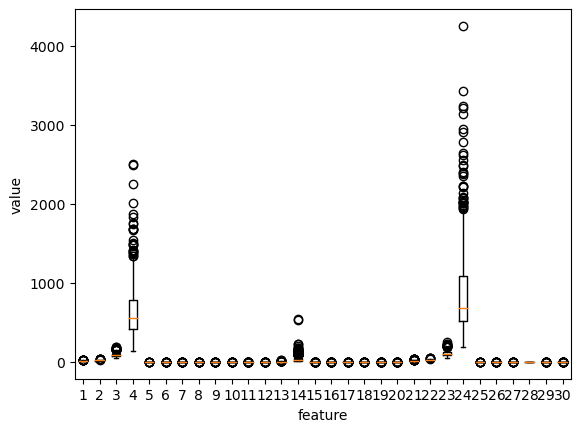

In [112]:

import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show
print(cancer.feature_names[4]) 
print(cancer.feature_names[24]) 


### Split dataset
- Evaluate the performance: divide the training and testing sets
- Rules:
    - Train should be more
    - before dividing, (+) and (-) classes should be mixed train and test evenly
    - Ratio classes: 2:1

| Ratio | Train | Test |
|--------|-----------|-----------|
|   Right   |  ++++ vs --   |   ++ vs -  |
|  Wrong   |   +++ vs --  |   ++ vs --  | 

In [113]:
from sklearn.model_selection import train_test_split
# Prepare input features (X) and target variable (y)
x = cancer.data  # featues
y = cancer.target  # labels

# y_train and y_test is target (result from x_train and x_test)
# stratify=y make sure same ratio when split, ensures that each split of the data has the same proportion of class labels as the original dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

## Visualize with TSNE and PCA: mapping high dimensional data to lower dimensional space (2 or 3D for n_components) for space reduction 

- Make data easier to look at by human eyes so that can recognize the pattern better

(569, 2)
Length of transformed data: 569, KL divergence: 0.012466751039028168


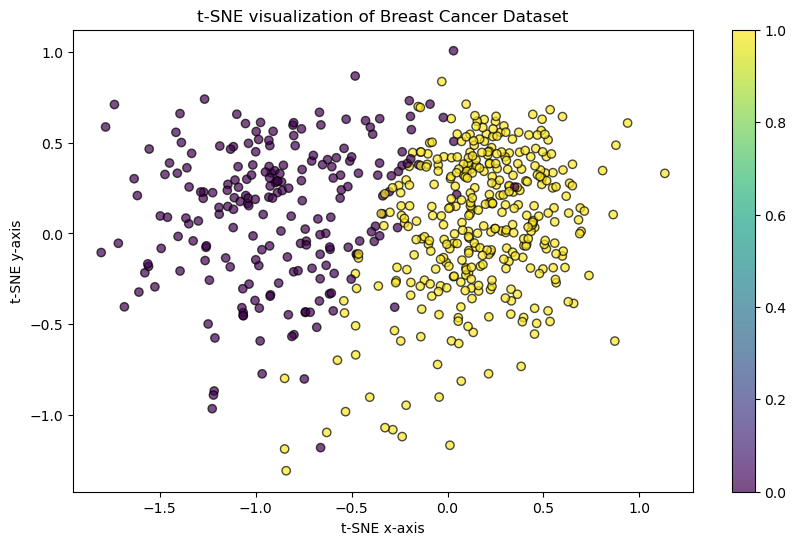

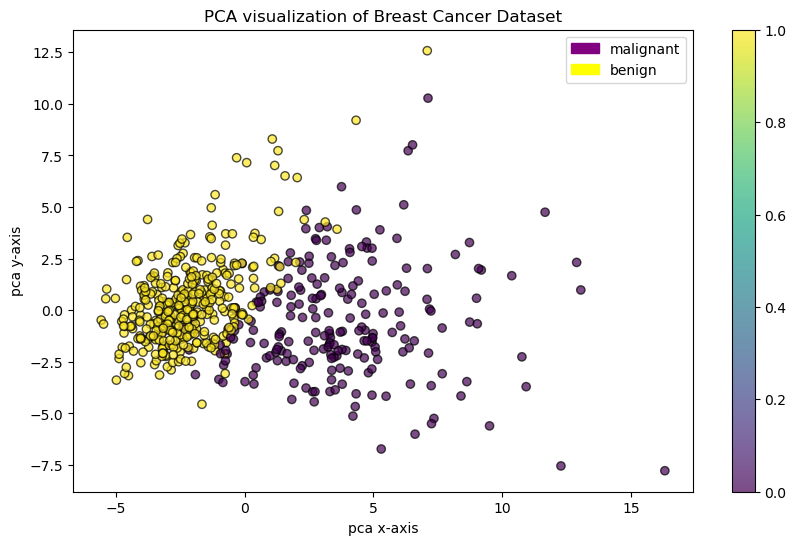

(array([[-1.5584834 , -0.18148948],
        [-0.7614611 ,  0.5768757 ],
        [-1.1456423 ,  0.14891836],
        ...,
        [-0.5394643 ,  0.4692844 ],
        [-1.5627013 , -0.16773668],
        [ 0.8086964 ,  0.3469438 ]], dtype=float32),
 array([[ 9.19283683,  1.94858307],
        [ 2.3878018 , -3.76817174],
        [ 5.73389628, -1.0751738 ],
        ...,
        [ 1.25617928, -1.90229671],
        [10.37479406,  1.67201011],
        [-5.4752433 , -0.67063679]]))

In [114]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
# from mpl_toolkits.mplot3d import Axes3D

def visualize_tsne_2d(X,y):
    # standarlize features values in particular range: mean of 0 and a standard deviation of 1
    scale = StandardScaler()
    x_scale = scale.fit_transform(X)

    # apply T-SNE to reduce dimension to 2D for visualization
    # perplexity is related to the number of nearest neighbors
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=500,
            random_state=42)
    
    # tranformation from high dimenstion to lower 2D
    x_tsne = tsne.fit_transform(x_scale)
    print(x_tsne.shape)
    # kl divergence to measure how well t-sne: the smaller number the better performance
    print(f"Length of transformed data: {len(x_tsne)}, KL divergence: {tsne.kl_divergence_}")

    # Plot tsne
    plt.figure(figsize=(10,6))
    plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar()
    plt.title('t-SNE visualization of Breast Cancer Dataset')
    plt.xlabel('t-SNE x-axis')
    plt.ylabel('t-SNE y-axis')


    pca = PCA(n_components=2, svd_solver='arpack')
    x_pca = pca.fit_transform(x_scale)
    # print(f"Length of transformed data: {len(x_pca)}, KL divergence: {pca.kl_divergence_}")

    # Plot PCA
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar()
    plt.title('PCA visualization of Breast Cancer Dataset')
    plt.xlabel('pca x-axis')
    plt.ylabel('pca y-axis')


    # Adding legend
    classes = cancer.target_names  # ['Benign', 'Malignant']
    colors = ['purple', 'yellow'] 
    color_tag = []

    for color, name in zip(colors, classes):
        patch = mpatches.Patch(color=color, label=name)
        color_tag.append(patch)

    plt.legend(handles=color_tag, loc='best')
    # plt.savefig('tsne.png',bbox_inches ="tight")
    plt.show()

    
    # return to numpy shape of tsne and pca
    return x_tsne, x_pca

visualize_tsne_2d(x,y)

### Build neuron

In [115]:
import numpy as np
# debug for weighted sum
a = np.array([1,2,3])
b = np.array([3,4,5])
print(a+b)
print(a*b)

[4 6 8]
[ 3  8 15]


## Logistic Regression Neuron 

In [116]:
class LogisticNeuron:
    def __init__(self):
        self.weight = None
        self.bias = None

    # Cal weighted sum of input. It is linear equation x1w1+x2w2+b
    def feed_forward(self,x):
        # z = np.sum(x * self.weight) + self.bias
        z = np.dot(x,self.weight) + self.bias

        return z
    
    # after the output, do the backprob to adjust the err to minimize it
    def backprop(self, x, err):
        # cal the gradiendt on weight
        weight_gradient = x * err
        bias_gradient = 1 * err
        return weight_gradient, bias_gradient
    
    def fit(self, x, y, epochs=100):
        self.weight = np.ones(x.shape[1]) #initilizing weight and bias
        self.bias = 0 #intercept
        for i in range(epochs):
            for x_i, y_i in zip(x,y): # for all sample
                z = self.feed_forward(x_i) #compute forward
                a = self.activation(z)
                err = -(y_i - a) # the partial derivztive
                weight_gradient, bias_gradient = self.backprop(x_i, err)
                # update weight and bias during backprop process
                self.weight -= weight_gradient
                self.bias -= bias_gradient

    # sigmoid: sqauash the weighted sum in value -1 and 1
    def activation(self, z):
        a = 1/(1 + np.exp(-z))  # sigmoid
        return a
    
    def predict(self, x):
        z = [self.feed_forward(x_i) for x_i in x]  # Apply linear function: feedforward for each sample
        a = self.activation(np.array(z))  # Use activation function on all results
        return a > 0.5  # Return True/False based on the threshold of 0.5



In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

# debug in numpy
# x_test_scaler
# x_train_scaler

# ininitalze logisticneuro
neuron = LogisticNeuron()
neuron.fit(x_train_scaler, y_train)

# give prdiction on test set
prediction = neuron.predict(x_test_scaler)
accuracy = np.mean(prediction == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [118]:
# ininitalze logisticneuro
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

# give prdiction on test set
prediction = neuron.predict(x_test)
accuracy = np.mean(prediction == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


/var/folders/6z/_3s8vznx77ngnml5pdjyjn0h0000gn/T/ipykernel_33741/3163595152.py:35: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))  # sigmoid


## Train Single Layer with ANN with multiple gradient decent method
- Add function to save the result of Loss Function

In [119]:
class SingleLayer:
    def __init__(self):
        self.weight = None
        self.bias = None
        self.losses = []

    # Cal weighted sum of input. It is linear equation x1w1+x2w2+b
    def feed_forward(self,x):
        z = np.dot(x, self.weight) + self.bias
        return z
    
    # after the output, do the backprob to adjust the err to minimize it
    def backprop(self, x, err):
        # cal the gradiendt on weight
        weight_gradient = x * err
        bias_gradient = 1 * err
        return weight_gradient, bias_gradient
    
    def fit(self, x, y, epochs=100):
        self.weight = np.ones(x.shape[1]) #initilizing weight and bias
        self.bias = 0 #intercept
        for i in range(epochs): # for all sample
            loss = 0
            # mix index: shuffle
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.feed_forward(x[i]) #compute forward
                a = self.activation(z) # apply activation
                err = -(y[i] - a) # result of the partial derivztive
                weight_gradient, bias_gradient = self.backprop(x[i], err) #cal backprob 
                # update weight and bias during backprop process
                self.weight -= weight_gradient
                self.bias -= bias_gradient
                # accumulate losses after clipping safe log cal: 
                # clip threshold during backprop
                a = np.clip(a, 1e-10, 1-1e-10)
                # average loss for every epoch
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))


    def activation(self, z):
        a = 1/(1 + np.exp(-z))  # sigmoid
        return a
    
    def predict(self, x):
        z = [self.feed_forward(x_i) for x_i in x]  # Apply linear function: feedforward for each sample
        return np.array(z) > 0  # apply step function as threshold

    def score(self, x, y):
        return np.mean(self.predict(x)==y)
    

In [120]:
# train with singlelayer
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/var/folders/6z/_3s8vznx77ngnml5pdjyjn0h0000gn/T/ipykernel_33741/3674726461.py:43: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))  # sigmoid


0.9298245614035088

In [129]:
# from sklearn.linear_model import SGDClassifier

# # stochastic using logistic loss fnction
# sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

# sgd.fit(x_train,y_train)
# sgd.score(x_test, y_test)

## Visulize the loss: the different between predict and actual values.
- Goal is to train the neural network such that to minimize the loss and improve accuracy of prediction
- loss decreases, and not overfit since it's not increase again

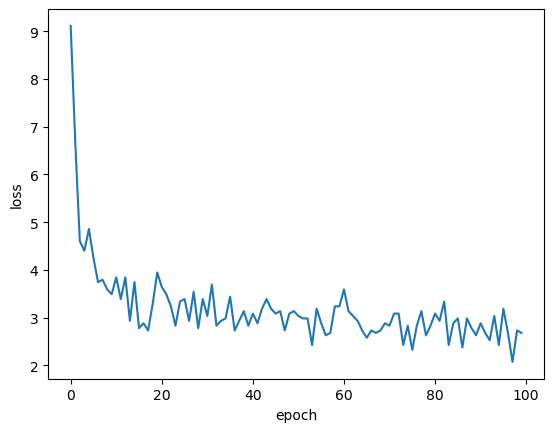

In [ ]:

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Using batch gradient decent: update gradient on entire dataset

In [124]:
class SingleLayer2:
    def __init__(self):
        self.weight = None
        self.bias = None
        self.losses = []

    # Cal weighted sum of input. It is linear equation x1w1+x2w2+b
    def feed_forward(self,x):
        z = np.dot(x, self.weight) + self.bias
        return z
    
    # Using matrix transpose of X^T*E
    def backprop(self, x, err):
        m = len(x)
        # cal the average gradiendt on weight, bias
        weight_gradient = np.dot(x.T, err) / m
        bias_gradient = np.sum(err)/m
        return weight_gradient, bias_gradient
    
    def fit(self, x, y, epochs=100):
        self.weight = np.ones(x.shape[1]) #initilizing weight and bias
        self.bias = 0 #intercept
        for i in range(epochs): # for all sample
            z = self.feed_forward(x[i]) #compute forward
            a = self.activation(z) # apply activation
            err = -(y - a) # result of the partial derivztive
            weight_gradient, bias_gradient = self.backprop(x[i], err) #cal backprob 
            # update weight and bias during backprop process
            self.weight -= weight_gradient
            self.bias -= bias_gradient
            # accumulate losses after clipping safe log cal: 
            # clip threshold during backprop
            a = np.clip(a, 1e-10, 1-1e-10)
            # average loss for every epoch
            loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))

    def activation(self, z):
        a = 1/(1 + np.exp(-z))  # sigmoid
        return a
    
    def predict(self, x):
        z = [self.feed_forward(x_i) for x_i in x]  # Apply linear function: feedforward for each sample
        return np.array(z) > 0  # apply step function as threshold

    def score(self, x, y):
        return np.mean(self.predict(x)==y)
    